# PINN Learning Curves

In [9]:
import os
from dotenv import load_dotenv
import sys

In [10]:
load_dotenv()

lib_dir = os.environ.get("LOCAL_LIB_DIR")
sys.path.append(lib_dir)

data_dir_airfoil = os.environ.get("LOCAL_DATA_DIR_AIRFOIL")
model_dir_airfoil = os.path.join(data_dir_airfoil, "models")

In [11]:
import pandas as pd
import torch
import yaml
import plotly.express as px
import plotly.graph_objects as go
from airfoil_pinn import AirfoilPINN

In [12]:
with open("config_airfoil.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [13]:
device = torch.device("cpu")

In [14]:
# load model
model_name = config["model_name"]
model_checkpoint_num = config["model_checkpoint_num"]

pinn = AirfoilPINN.load_from_checkpoint_for_testing(model_dir_airfoil, model_name, model_checkpoint_num).to(device)

=> loading checkpoint '/Users/ggito/repos/pinns/data/airfoil/models/AeroElegantInnovator846/200.pt'
=> loaded checkpoint '/Users/ggito/repos/pinns/data/airfoil/models/AeroElegantInnovator846/200.pt' (epoch 200)


=> saving learning curves plot at /Users/ggito/repos/pinns/data/airfoil/models


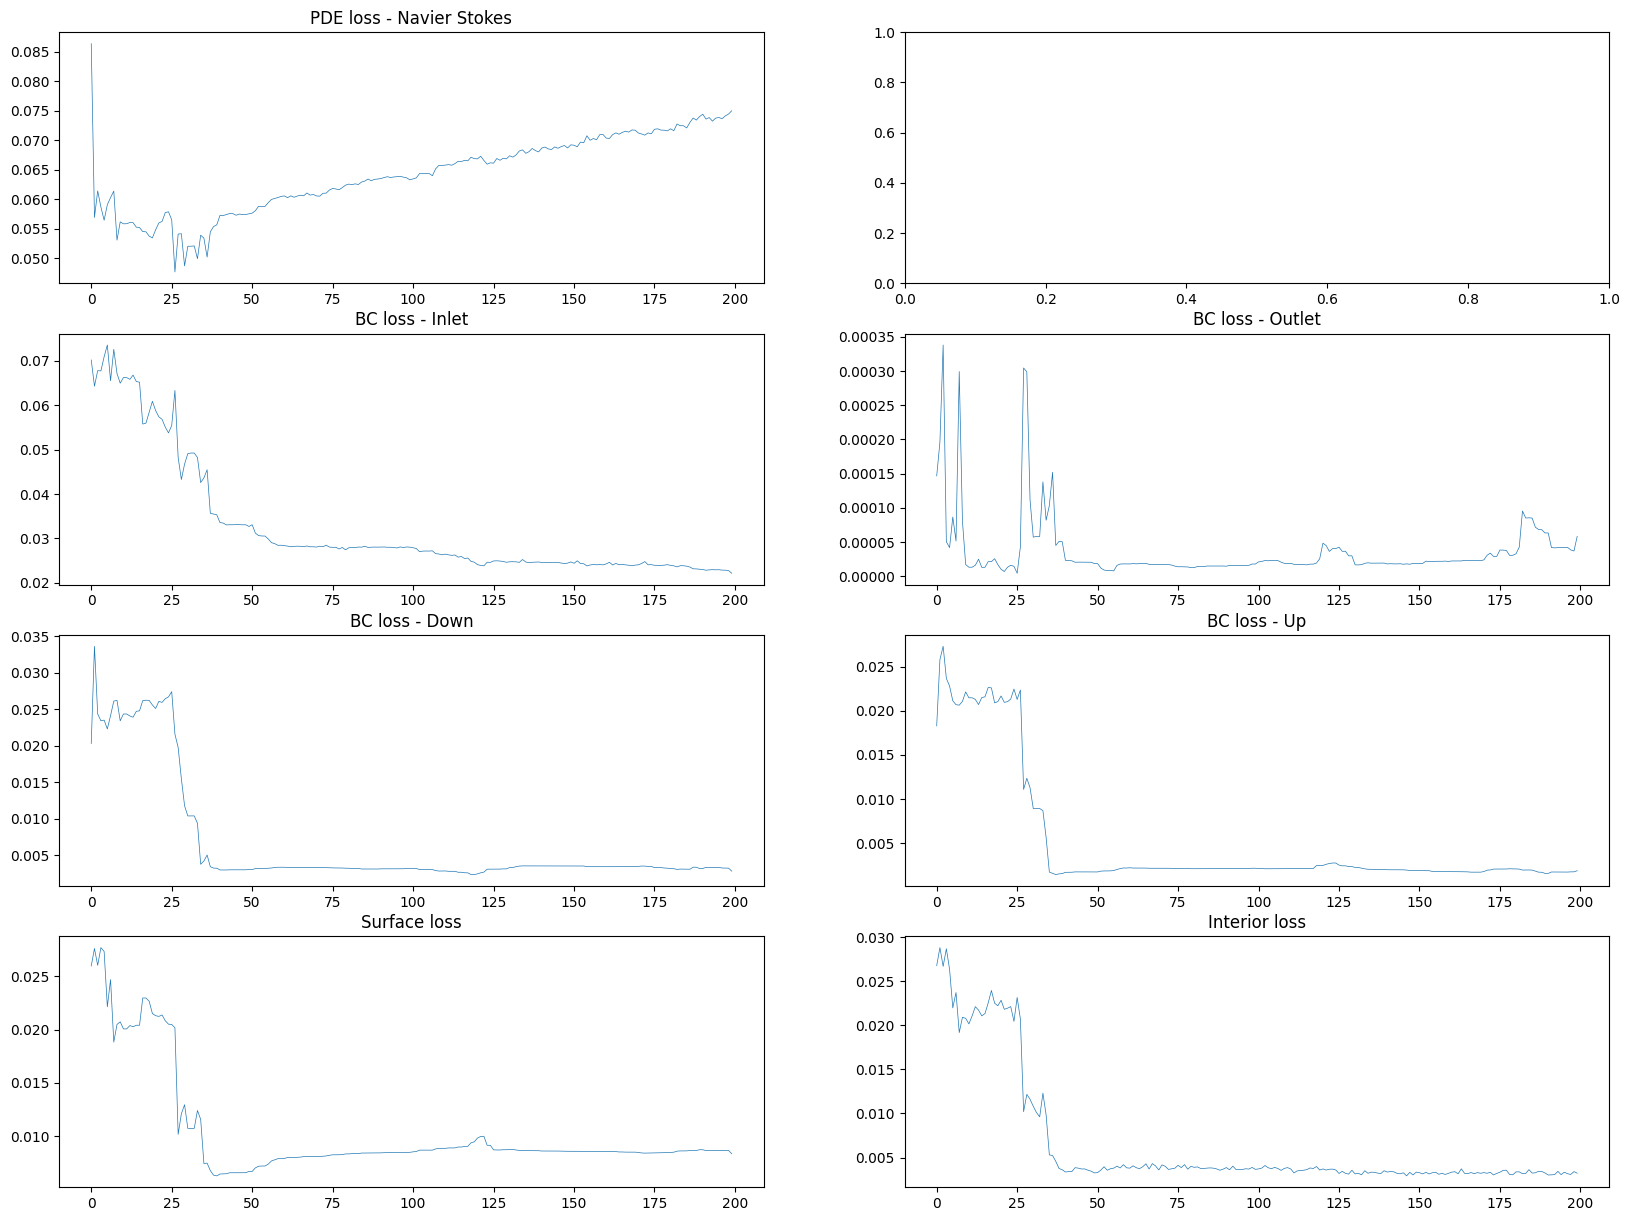

In [15]:
pinn.plot_learning_curves(save=True, output_dir=model_dir_airfoil)

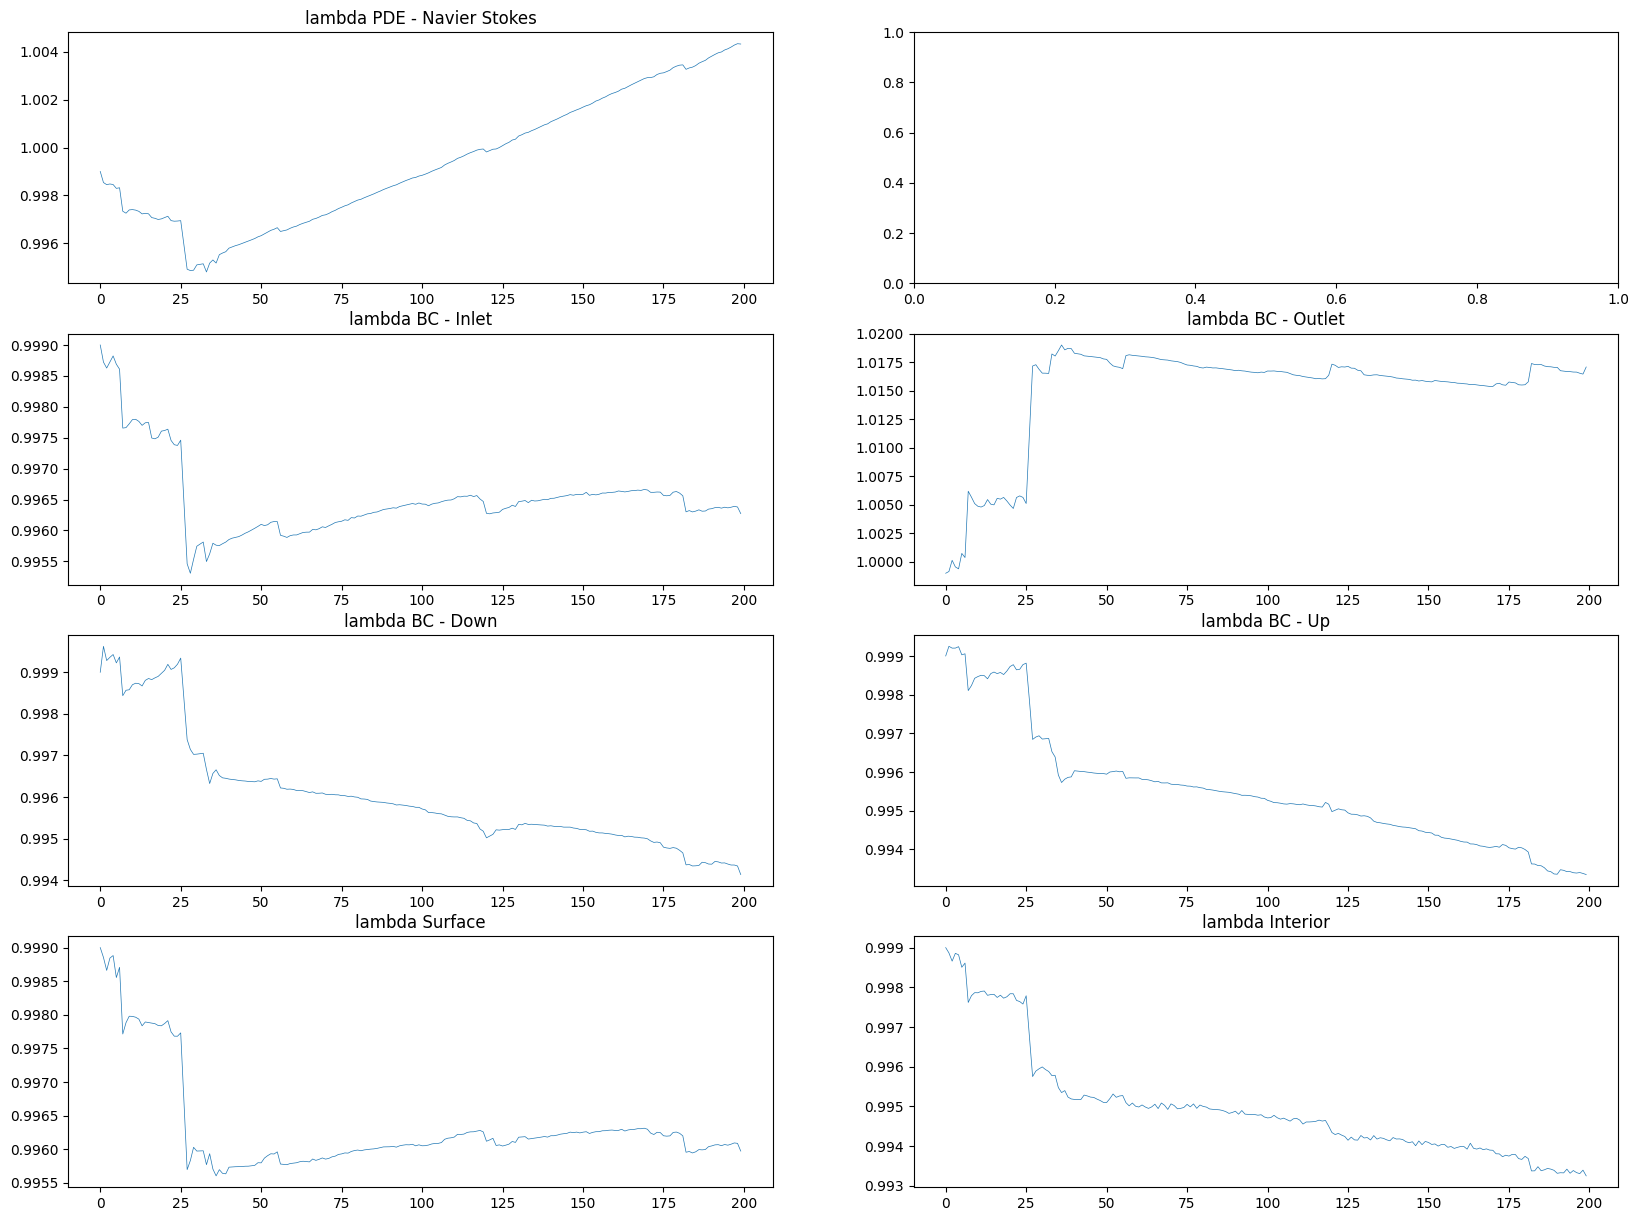

In [16]:
pinn.plot_lambdas()